In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay


### Load data:

In [3]:
df = pd.read_csv('../data/archive/churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Information about data:
- **RowNumber**—corresponds to the record (row) number and has no effect on the output.
- **CustomerId**—contains random values and has no effect on customer leaving the bank.
- **Surname**—the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography**—a customer’s location can affect their decision to leave the bank.
- **Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.

## Exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Target feature isn't balanced: 

In [6]:
df['Exited'].value_counts().T

Exited
0    7963
1    2037
Name: count, dtype: int64

Visualizing the imbalance:

<Axes: xlabel='Exited', ylabel='count'>

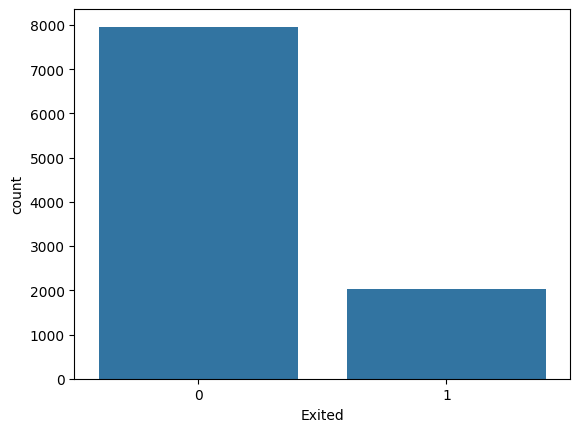

In [7]:
sns.countplot(df, x='Exited')

Credit score does not really play a role in customer exiting the bank:

<Axes: xlabel='Exited', ylabel='CreditScore'>

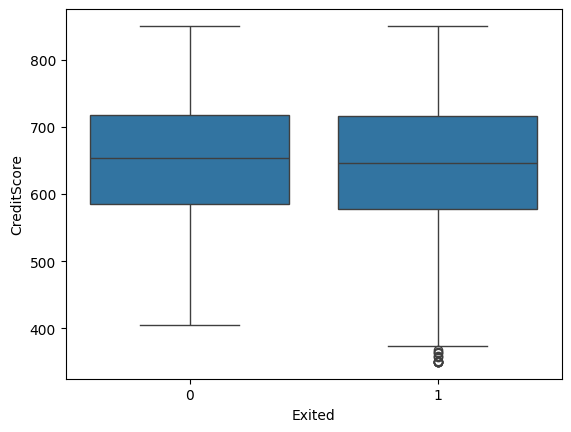

In [8]:
sns.boxplot(df, x='Exited', y='CreditScore')

<Axes: xlabel='Exited', ylabel='Age'>

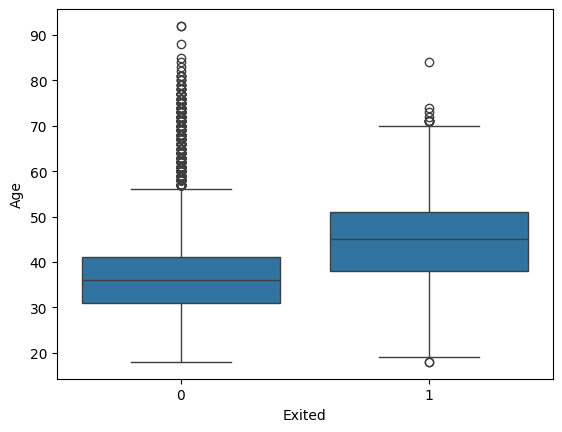

In [9]:
sns.boxplot(df, x='Exited', y='Age')

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

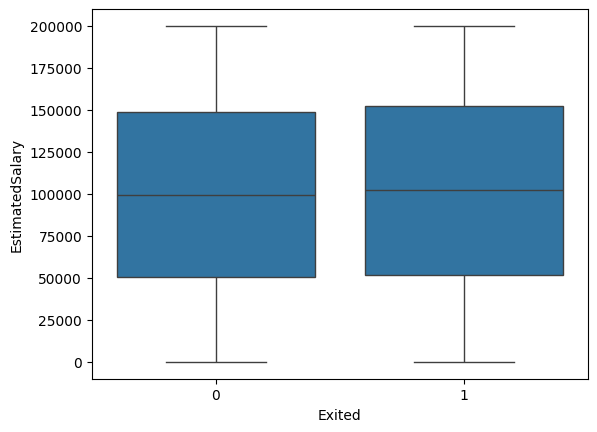

In [10]:
sns.boxplot(df, x='Exited', y='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='Balance'>

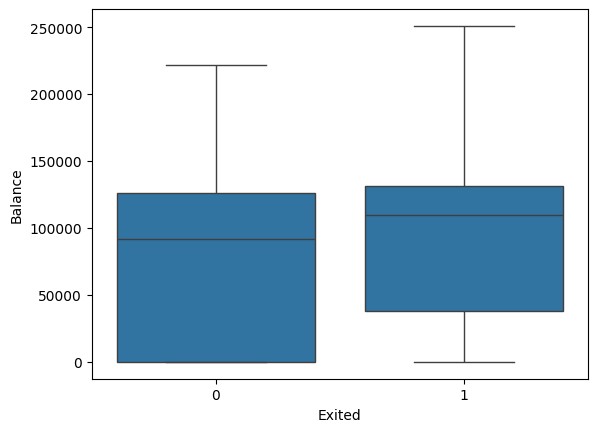

In [11]:
sns.boxplot(df, x='Exited', y='Balance')

<Axes: xlabel='Balance', ylabel='Age'>

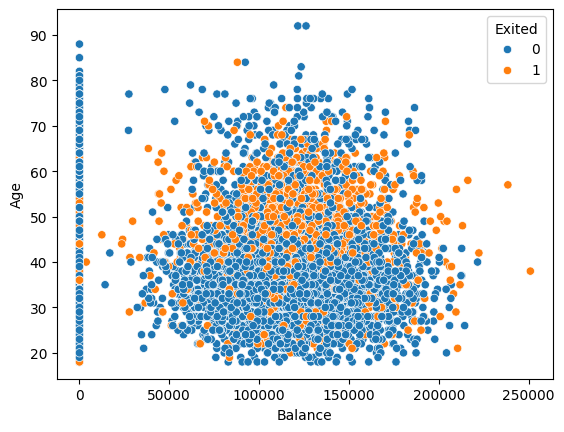

In [12]:
sns.scatterplot(df, x='Balance', y='Age', hue='Exited')

Percentage of people that have balance 0. Not sure if we must exclude these people, but I think it is normal that the majority of customers has 0 balance.

In [13]:
len(df[df['Balance'] == 0]) / len (df[df['Balance'] != 0])

0.5666614444618518

Correlation between different features:

<Axes: >

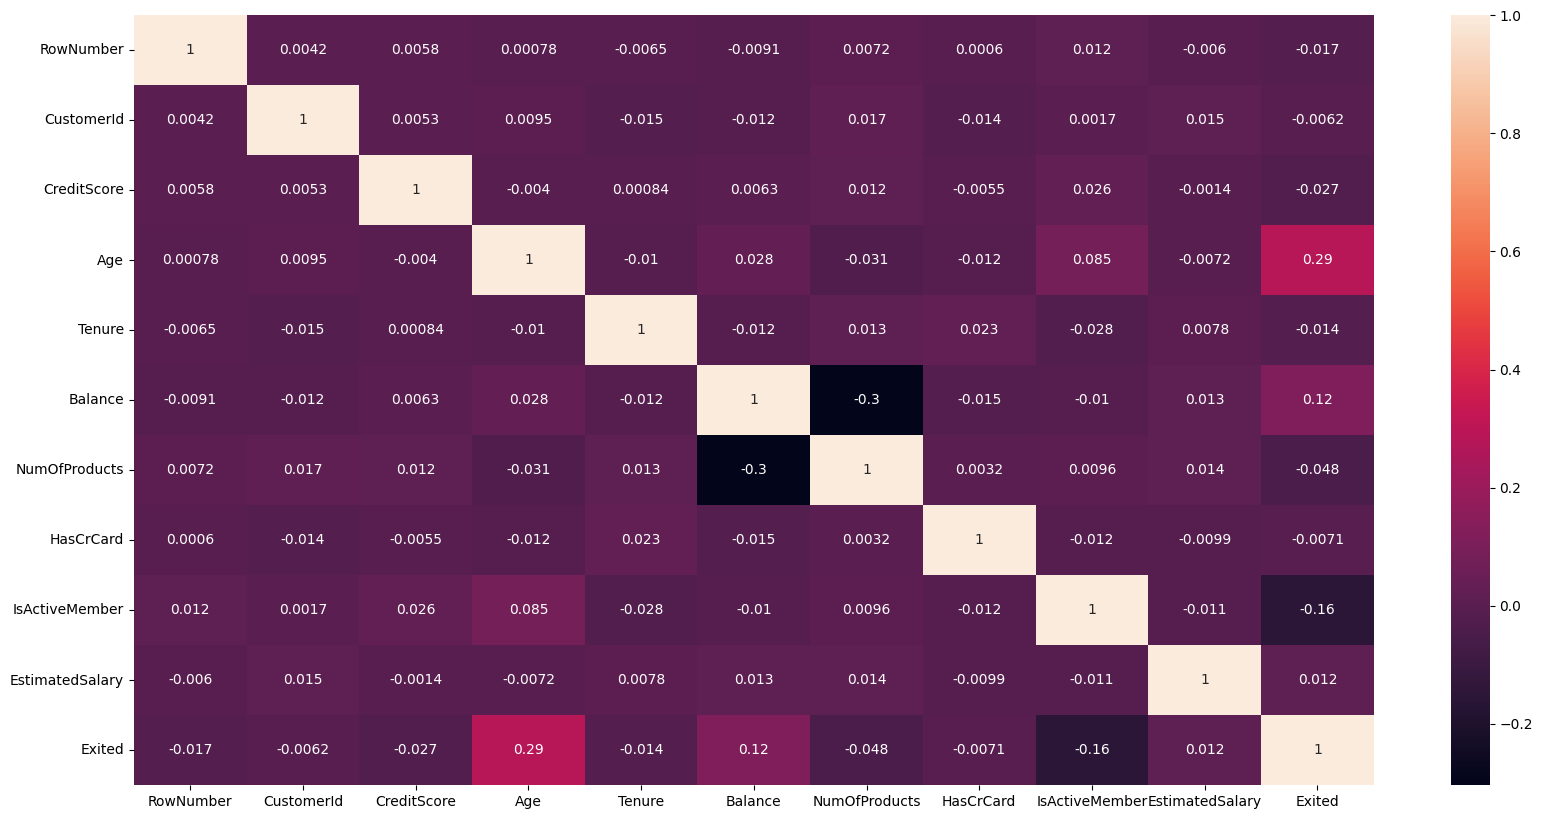

In [14]:
numeric_df = df.drop(['Surname', 'Geography', 'Gender'], axis=1)
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_df.corr(),annot=True)

**We can conclude that Age, Balance and IsActiveMember are the features that have the most correlation with Exited**

## Data preparation

In [15]:
# I don't know what to do with non numeric types of information
X = numeric_df.drop('Exited', axis=1)
y  = numeric_df['Exited']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [17]:
sc = StandardScaler()
sc

StandardScaler()

In [25]:
scaled_X_train = sc.fit_transform(X_train)
scaled_X_train
scaled_X_test = sc.transform(X_test)
scaled_X_test

array([[ 0.42202633, -0.04193103, -0.5836166 , ..., -1.54803408,
        -1.03016917, -1.02396381],
       [-0.12153358,  0.64803448, -0.30302599, ...,  0.64598061,
         0.97071435,  0.79009571],
       [-1.14521496,  0.43558184, -0.53165538, ...,  0.64598061,
        -1.03016917, -0.73304841],
       ...,
       [-0.68346636, -1.55870871, -0.44851742, ...,  0.64598061,
         0.97071435,  0.88628042],
       [ 0.50349098, -1.62084201, -0.74989252, ..., -1.54803408,
         0.97071435, -0.638471  ],
       [-0.11425376,  0.82273295, -1.23832804, ..., -1.54803408,
        -1.03016917, -0.98817066]])

## Logistic regression

In [23]:
model = LogisticRegression()
model

LogisticRegression()

In [26]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [30]:
predictions = model.predict(scaled_X_test)

In [31]:
accuracy_score(y_test, predictions)

0.811

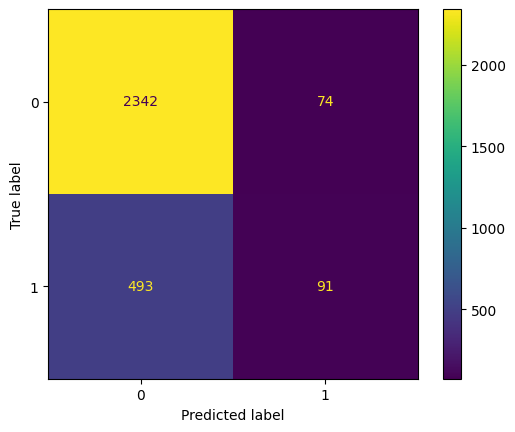

In [33]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

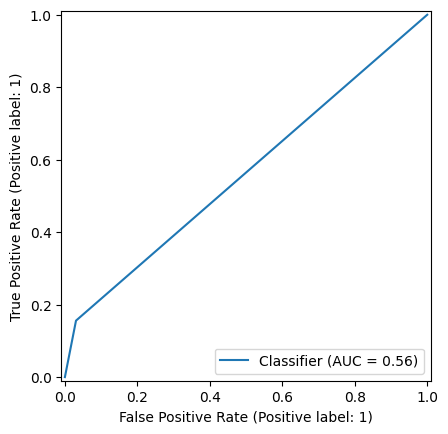

In [35]:

RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()